In [108]:
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import calendar

In [ ]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

## Loading the data 

In [124]:
df_merged = pd.read_csv(r"C:\Users\rapha\OneDrive\ironhack\projects\Project_Final_Ironhack\cleaned_data\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1845,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN
1846,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN
1847,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN
1848,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN


In [12]:
df_merged_2 = pd.read_csv(r"C:\Users\rapha\OneDrive\ironhack\projects\Project_Final_Ironhack\cleaned_data\df_merged_2_quandl.csv") # open the dataframe
df_merged_2['Date'] = df_merged_2["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged_2

,Date,S&P 500,GDP,Cons. Sent.,US Big Mac
0,1871-01-01,105.76,NaN,NaN,NaN
1,1871-02-01,104.02,NaN,NaN,NaN
2,1871-03-01,105.01,NaN,NaN,NaN
3,1871-04-01,112.01,NaN,NaN,NaN
4,1871-05-01,117.56,NaN,NaN,NaN
...,...,...,...,...,...
1845,2022-09-01,3850.52,NaN,58.6,NaN
1846,2022-09-01,3585.62,NaN,58.6,NaN
1847,2022-10-01,3726.05,NaN,NaN,NaN
1848,2022-10-01,3871.98,NaN,NaN,NaN


## First Visalization 

AttributeError: 'list' object has no attribute 'set'

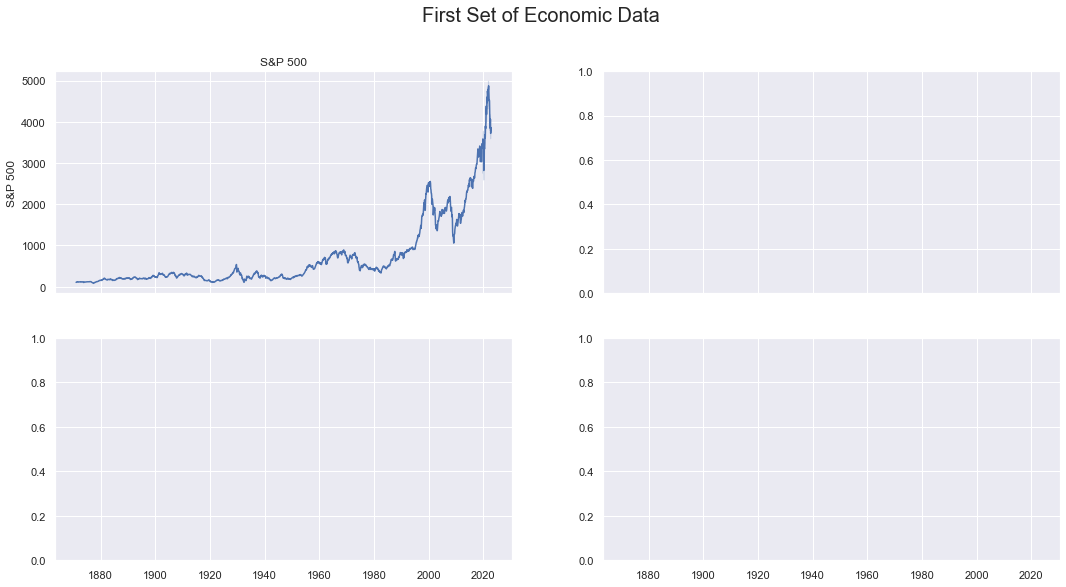

In [132]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('First Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='S&P 500').set(title='S&P 500')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='M2').set(title='Monetary Aggregate M2')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='GDP').set(title='GDP')
sns.lineplot(ax=axes[1, 1], data=df_merged, x='Date', y='CPI').set(title='Consumer Price Index')


[Text(0.5, 1.0, 'US Big Mac')]

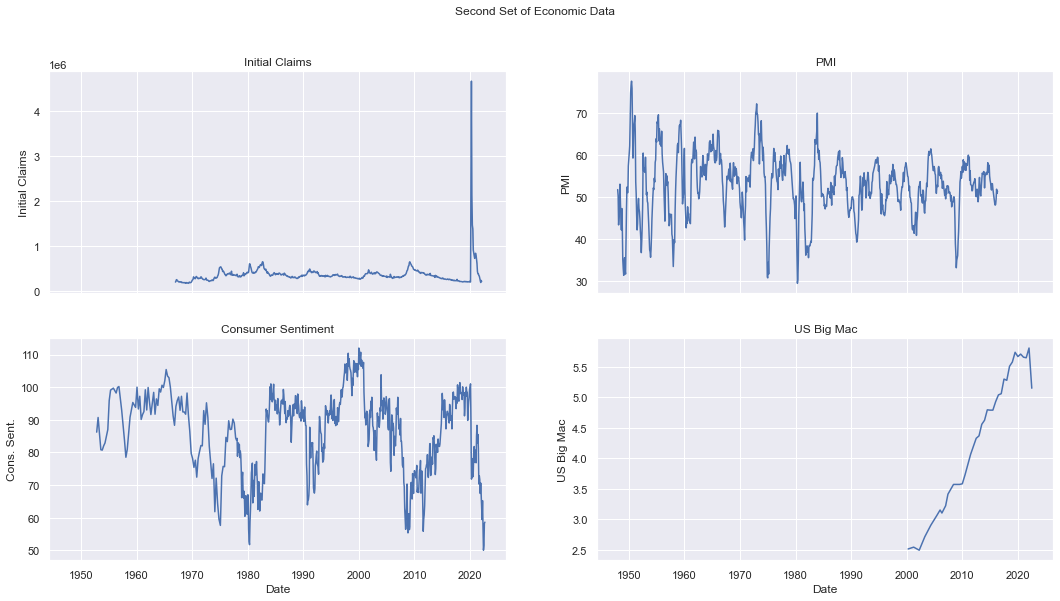

In [18]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('Second Set of Economic Data')

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='Initial Claims').set(title='Initial Claims')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='PMI').set(title='PMI')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='Cons. Sent.').set(title='Consumer Sentiment')
sns.lineplot(ax=axes[1, 1], data=df_merged_2, x='Date', y='US Big Mac').set(title='US Big Mac')

[Text(0.5, 1.0, 'Revolving Credit')]

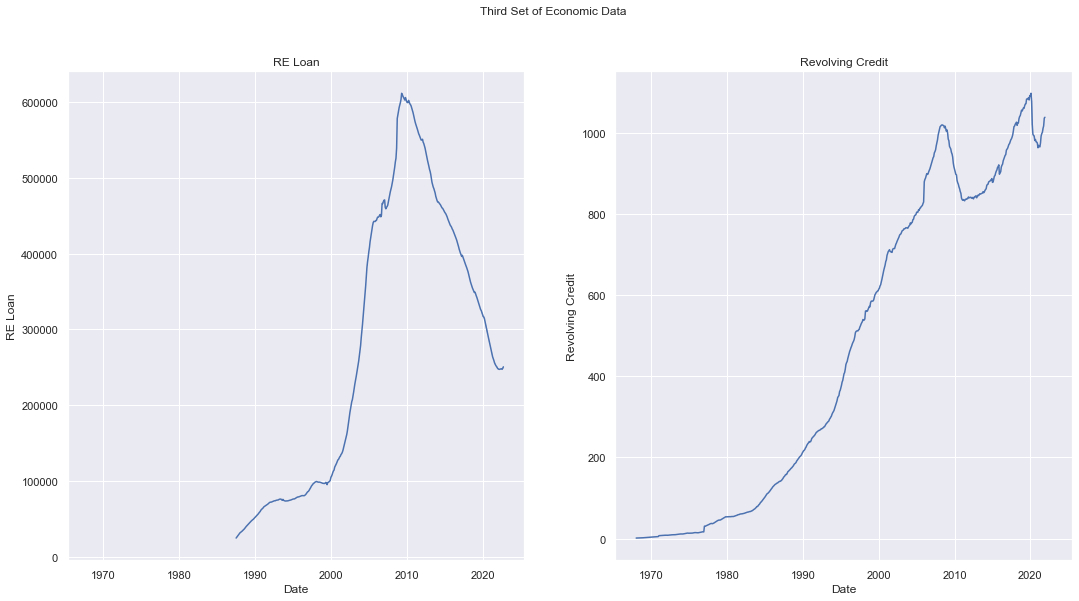

In [25]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18,9))
figure.suptitle('Third Set of Economic Data')

sns.lineplot(ax=axes[0], data=df_merged, x='Date', y='RE Loan').set(title='RE Loan')
sns.lineplot(ax=axes[1], data=df_merged, x='Date', y='Revolving Credit').set(title='Revolving Credit')

### Correlation matrix  

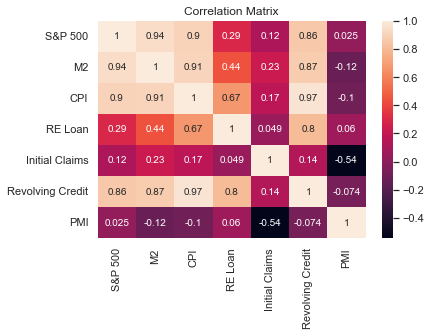

In [36]:
corr_matrix = df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr()
sns.heatmap(corr_matrix, annot=True).set(title='Correlation Matrix')
plt.show()

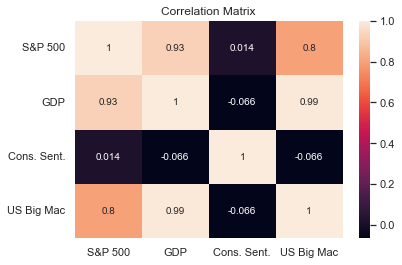

In [37]:
corr_matrix_2 = df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr()
sns.heatmap(corr_matrix_2, annot=True).set(title='Correlation Matrix')
plt.show()

In [39]:
df_merged['daily_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(1)) -1
df_merged['daily_return']

0            NaN
1      -0.016452
2       0.009517
3       0.066660
4       0.049549
          ...   
1845   -0.026417
1846   -0.068796
1847    0.039165
1848    0.039165
1849   -0.004101
Name: daily_return, Length: 1850, dtype: float64

In [55]:
df = pd.DataFrame(df_merged['daily_return']) 
df

,daily_return
0,NaN
1,-0.016452
2,0.009517
3,0.066660
4,0.049549
...,...
1845,-0.026417
1846,-0.068796
1847,0.039165
1848,0.039165


In [63]:
df.describe()

,daily_return
count,1849.000000
mean,0.002922
std,0.044184
min,-0.312682
25%,-0.017284
50%,0.005576
75%,0.026073
max,0.514085


In [61]:
pos_count, neg_count = 0, 0

for num in df['daily_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  1045
Negative numbers in the list:  805


In [67]:
df_merged['monthly_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(30)) - 1
df_merged['monthly_return']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1845   -0.030801
1846   -0.142436
1847   -0.190441
1848   -0.157417
1849   -0.167192
Name: monthly_return, Length: 1850, dtype: float64

In [69]:
df_merged['annual_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(360)) - 1
df_merged['annual_return']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1845    3.181621
1846    2.922826
1847    3.128587
1848    3.214354
1849    3.068045
Name: annual_return, Length: 1850, dtype: float64

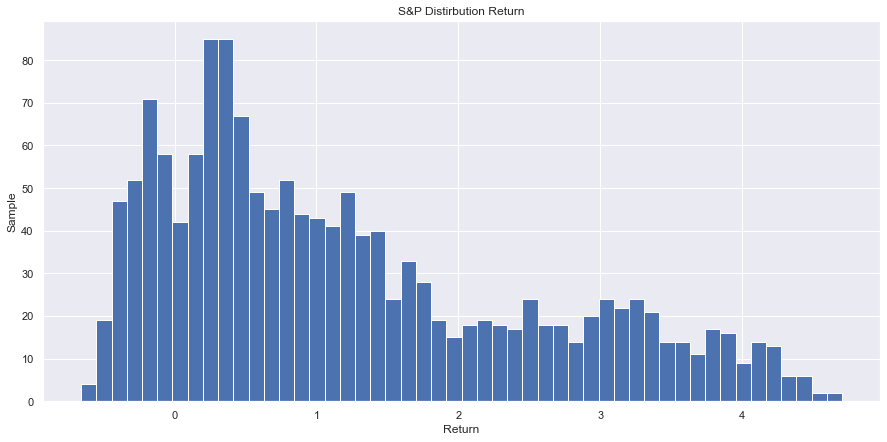

In [70]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['annual_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.show()

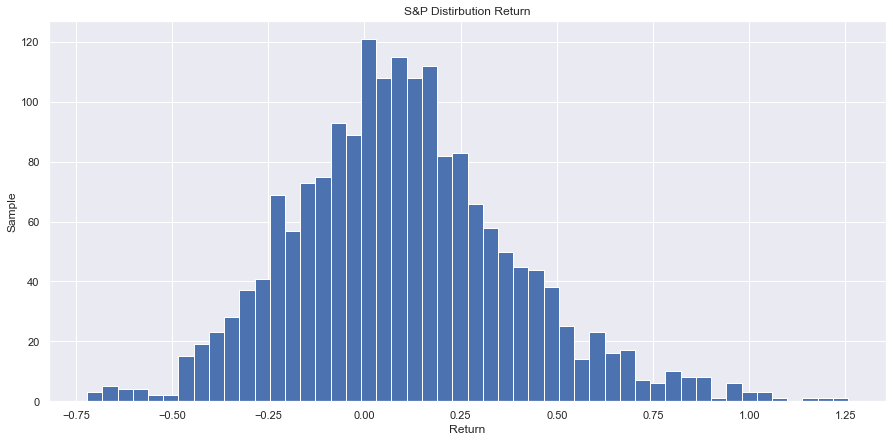

In [68]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['monthly_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.show()

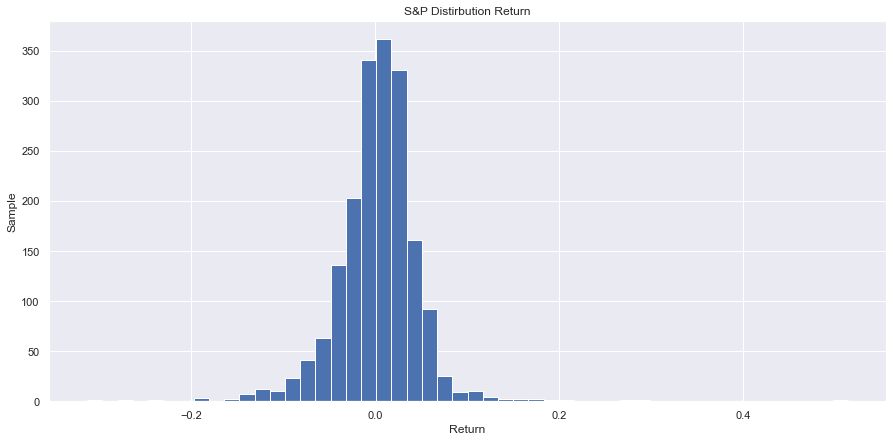

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['daily_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.show()

In [73]:
df_merged = df_merged.set_index(pd.DatetimeIndex(df_merged['Date'].values)) #set the date as the index
df_merged.drop(['Date'], inplace = True, axis = 1) # getting ride of the date column
df_merged

,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI,daily_return,monthly_return,annual_return
1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,-0.016452,NaN,NaN
1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,0.009517,NaN,NaN
1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,0.066660,NaN,NaN
1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,0.049549,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,-0.026417,-0.030801,3.181621
2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN,-0.068796,-0.142436,2.922826
2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,0.039165,-0.190441,3.128587
2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN,0.039165,-0.157417,3.214354


In [76]:
daily_simple_returns = df_merged.pct_change() #get the simple daily return of the assets
daily_simple_returns

,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI,daily_return,monthly_return,annual_return
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,NaN,-0.016452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,NaN,0.009517,NaN,NaN,NaN,NaN,NaN,-1.578483e+00,NaN,NaN
1871-04-01,NaN,0.066660,NaN,NaN,NaN,NaN,NaN,6.004047e+00,NaN,NaN
1871-05-01,NaN,0.049549,NaN,NaN,NaN,NaN,NaN,-2.566920e-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,-0.004033,-0.026417,0.002151,0.005266,0.0,0.0,0.0,-4.819354e-01,-0.683855,-0.025023
2022-09-01,0.000000,-0.068796,0.000000,0.000000,0.0,0.0,0.0,1.604209e+00,3.624364,-0.081340
2022-10-01,-0.004520,0.039165,0.004056,0.007663,0.0,0.0,0.0,-1.569289e+00,0.337030,0.070398
2022-10-01,0.000000,0.039165,0.000000,0.000000,0.0,0.0,0.0,6.213101e-07,-0.173409,0.027414


In [77]:
#Calculate the annualized return 
annualized_returns = daily_simple_returns.mean()*252 
annualized_returns

M2                   1.375761
S&P 500              0.736223
CPI                  0.645696
RE Loan              1.311856
Initial Claims       3.354177
Revolving Credit     2.597058
PMI                  0.316730
daily_return              NaN
monthly_return      14.187466
annual_return       -4.414287
dtype: float64

In [102]:
#Create lists to store the daily simple return DSR for each day
Mon =[]
Tues=[]
Wed=[]
Thurs=[]
Fri=[]
Sat=[]
Sun=[]

In [113]:
def get_dsr(day, dsr):
    if day == 'Monday':
        Mon.append(float(dsr))
    elif day == 'Tuesday':
        Tues.append(float(dsr))
    elif day == 'Wednesday':
        Wed.append(float(dsr))
    elif day == 'Thursday':
        Thurs.append(float(dsr))
    elif day == 'Friday':
        Fri.append(float(dsr))
    elif day == 'Saturday':
        Sat.append(float(dsr))
    elif day == 'Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wrong with the input for the day')


In [104]:
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1845,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN
1846,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN
1847,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN
1848,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN


In [105]:
#https://www.youtube.com/watch?v=JhwPt2XI9oM
df_merged = df_merged.set_index(pd.DatetimeIndex(df_merged['Date'].values))
DSR = df_merged['S&P 500'].pct_change(1) # computing daily simple return
df_merged['DSR'] = DSR

In [106]:
df_merged = df_merged[1:] #remove first row

In [107]:
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI,DSR
1871-02-01,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,-0.016452
1871-03-01,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,0.009517
1871-04-01,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,0.066660
1871-05-01,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,0.049549
1871-06-01,1871-06-01,NaN,118.43,NaN,NaN,NaN,NaN,NaN,0.007400
...,...,...,...,...,...,...,...,...,...
2022-09-01,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,-0.026417
2022-09-01,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN,-0.068796
2022-10-01,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,0.039165
2022-10-01,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN,0.039165


In [117]:
# Create a loop to gather the daily simple return of each day from the data set
for i in range(0, len(df_merged)):
    df_merged_date = str(df_merged.index[i]) # get the current date and casting it as a string 
    df_merged_dsr = df_merged['DSR'][i] # get the current daily simple return 
    df_month = df_merged_date.split('-')[1] # get the current month
    curr_date = df_merged.index[i] # get the current date
    df_weekday = calendar.day_name[curr_date.weekday()] # get the weekday
    
    # add daily simple return to the corresponding list for the day
get_dsr(df_weekday, df_merged_dsr)

In [118]:
# create a function to average the returns of each weekday 
def AVG(day):
    if not day: # if this is true then the list is empty so return 
        return [0]
    else:
        return [sum(day)/len(day)]
        

In [119]:
df_returns = pd.DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'])
# Get the average for each weekday and add the values under the column called AVG
df_returns['AVG']= AVG(Mon) + AVG(Tues) + AVG(Wed) + AVG(Thurs) + AVG(Fri) + AVG(Sat) + AVG(Sun)

In [121]:
df_returns

,AVG
Monday,0.000000
Tuesday,-0.004101
Wednesday,0.000000
Thursday,0.000000
Friday,0.000000
Saturday,0.000000
Sunday,0.000000


<AxesSubplot: >

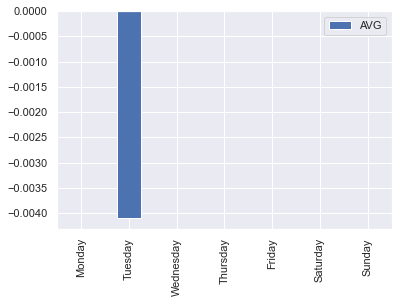

In [120]:
# plot the AVG daily simple returns 
df_returns.plot.bar()

In [64]:
#retrived from https://wire.insiderfinance.io/data-analysis-of-s-p500-stocks-in-python-investment-strategy-during-post-pandemic-a7cf8926ee3e

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]

In [65]:
df = first_table
print(df.shape)
df["Symbol"] = df["Symbol"].map(lambda x: x.replace(".", "-"))  # rename symbol to escape symbol error
sp500_tickers = list(df["Symbol"])
df.head()

(503, 9)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


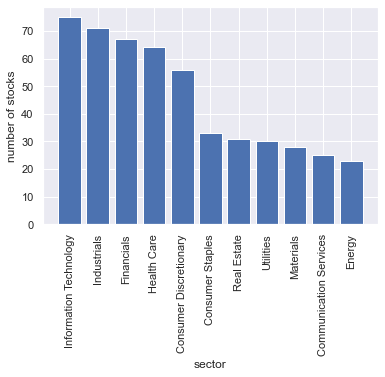

In [66]:
sectors = df["GICS Sector"].value_counts()
plt.bar(sectors.index, sectors.values)
plt.xticks(rotation=90)
plt.xlabel("sector")
plt.ylabel("number of stocks")
plt.show()